# Interval-related Analysis

This example can be referenced by [citing the package](https://github.com/neuropsychology/NeuroKit#citation).

This example shows how to use Neurokit to analyze longer periods of data (i.e., greater than 10 seconds) such as **resting state data**. If you are looking to perform event-related analysis on epochs, you can refer to this [Neurokit example](https://neurokit2.readthedocs.io/en/latest/examples/eventrelated.html) here.

In [5]:
# Load NeuroKit and other useful packages
import neurokit2 as nk
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
plt.rcParams['figure.figsize'] = [15, 9]  # Bigger images
plt.rcParams['font.size']= 13

## The Dataset

First, download the dataset located on the GitHub repository. 

It contains 5 minutes of physiological signals recorded at a frequency of 100Hz (5 x 60 x 100 = 30000 data points).

It contains the following signals : **ECG, PPG, RSP**

In [7]:
# Get data
data = pd.read_csv("https://raw.githubusercontent.com/neuropsychology/NeuroKit/master/data/bio_resting_5min_100hz.csv")

This is the resting state data from ***1*** **participant** who was asked to close his/her eyes for 8 minutes, trying not to think of anything as well as not to fall asleep. 

## Process the Signals

In this analysis here, we will focus on extracting **ECG** and **RSP** features. To process the respective physiological signals, you can use [ecg_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_process) and 
[rsp_process()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.rsp_process). You can then then visualize these signals using [ecg_plot()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_plot) and [rsp_plot()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.rsp_plot). For the purposes of these example, we will select just 3000 datapoints (or 30s) to visualize.

*Note:* Do remember to specify the correct `sampling_rate` (in this case, to 100Hz) in which the signals were generated, in all the relevant functions.

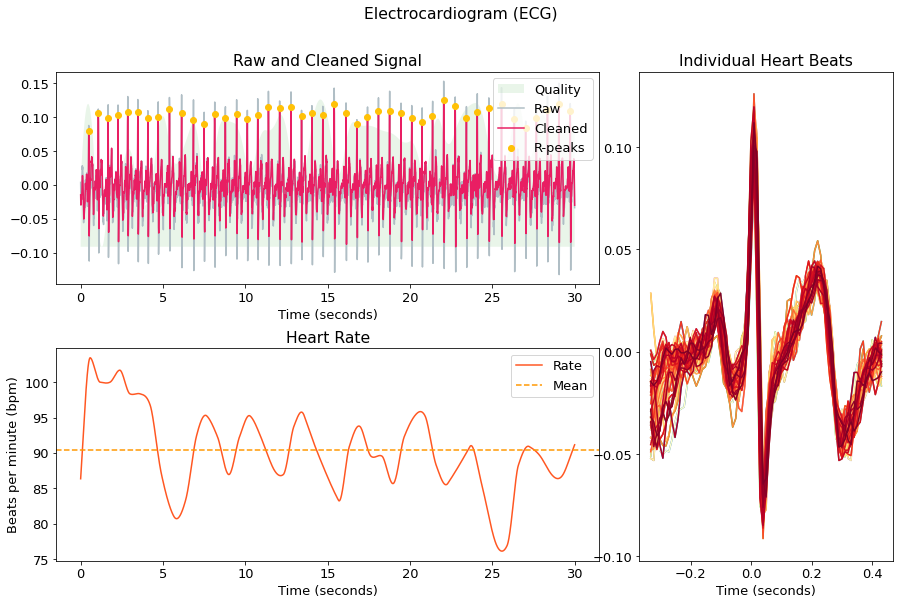

In [8]:
# Process ecg
ecg_signals, info = nk.ecg_process(data["ECG"], sampling_rate=100)
plot = nk.ecg_plot(ecg_signals[:3000], sampling_rate=100)

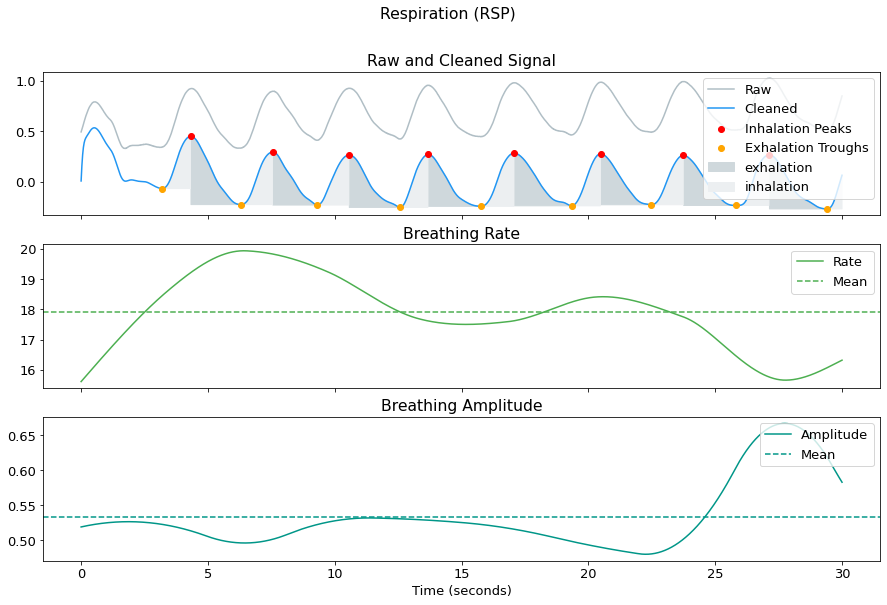

In [9]:
# Process rsp
rsp_signals, info = nk.rsp_process(data["RSP"], sampling_rate=100)
plot = nk.rsp_plot(rsp_signals[:3000], sampling_rate=100)

## Extract Features

Now that we have the processed signals, we can now perform the analysis using [ecg_intervalrelated()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.ecg_intervalrelated) and [rsp_intervalrelated()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.rsp_intervalrelated). Simply provide the processed dataframe and these functions will return a dataframe of the features pertaining to the specific signal.

These features will be quite different from event-related features (See [Event-related analysis example](https://neurokit2.readthedocs.io/en/latest/examples/eventrelated.html)) as these signals were generated over a longer period of time. Hence, apart from the mean signal rate, variability metrices pertaining to heart rate variability (HRV) and respiratory rate variability (RRV) are also extracted here.

In [10]:
nk.ecg_intervalrelated(ecg_signals)

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn
0,86.390449,3.883777,69.475638,4.903604,3.888256,0.07058,0.055901,69.0,4.4478,0.064461,...,NaN,0.885628,1.137604,2.749412,4.762122,1.732051,1.732051,2.32116,32.992946,1.978637


In [11]:
nk.rsp_intervalrelated(rsp_signals)

,RSP_Rate_Mean,RSP_Amplitude_Mean,RRV_RMSSD,RRV_MeanBB,RRV_SDBB,RRV_SDSD,RRV_CVBB,RRV_CVSD,RRV_MedianBB,RRV_MadBB,...,RRV_HF,RRV_LFHF,RRV_LFn,RRV_HFn,RRV_SD1,RRV_SD2,RRV_SD2SD1,RRV_ApEn,RRV_SampEn,RRV_DFA_2
0,15.748653,0.397941,119.691326,384.173333,100.662988,120.504248,0.262025,0.311556,371.0,57.8214,...,796537.787146,NaN,NaN,NaN,85.209371,114.041384,1.338367,0.717675,1.504077,0.618535


## Optional: Segmenting the Data

If you want to segment your data for analysis, such as analyzing two separate portions of your resting state data, you can simply do so by splitting the `ecg_signals` dataframe into **epochs** using [epochs_create()](https://neurokit2.readthedocs.io/en/latest/functions.html#neurokit2.epochs_create). Using this example dataset, let's say you want to analyze the first half and the second half of the ECG data. This means that each halved data would last for 60 x 2.5s = *150s*.  

In this function, we would also specify the onset of events to be at the 0th (for the first half of the data) and the 15000th datapoint (for the second half of the data), since there are 30000 data points in total. 

In [12]:
# Half the data
epochs = nk.epochs_create(ecg_signals, events=[0, 15000], sampling_rate=100, epochs_start=0, epochs_end=150)

This returns a dictionary of 2 processed ECG dataframes, which you can then enter into `ecg_intervalrelated()`. 

In [13]:
# Analyze
nk.ecg_intervalrelated(epochs)

,ECG_Rate_Mean,HRV_RMSSD,HRV_MeanNN,HRV_SDNN,HRV_SDSD,HRV_CVNN,HRV_CVSD,HRV_MedianNN,HRV_MadNN,HRV_MCVNN,...,HRV_LFn,HRV_HFn,HRV_LnHF,HRV_SD1,HRV_SD2,HRV_SD2SD1,HRV_CSI,HRV_CVI,HRV_CSI_Modified,HRV_SampEn
1,86.375729,3.638450,69.497674,5.167181,3.645389,0.074350,0.052354,69.0,4.4478,0.064461,...,NaN,NaN,NaN,2.577680,4.464672,1.732051,1.732051,2.265138,30.932155,1.252763
2,86.405170,4.032578,69.460465,4.648090,4.042033,0.066917,0.058056,69.0,4.4478,0.064461,...,NaN,NaN,NaN,2.858149,4.950459,1.732051,1.732051,2.354850,34.297785,1.881786


This then returns a dataframe of the analyzed features, with the rows representing the respective segmented signals. Try doing this with your own signals!